**Général setup et parametrage**

In [85]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from matplotlib.lines import Line2D

TAU = 2 * np.pi

GREY = (0.2,0.2,0.2)
NCHORDS_TO_PLOT = 1000

n_cordes = 10000

r = 1
# C'est la longeur du longeur du côté du triangle équilatéral inscrit dans le cercle
langueur_triangle = r * np.sqrt(3)

def setup_axes():
    """Set up the two Axes with the circle and correct limits, aspect."""

    fig, axes = plt.subplots(nrows=1, ncols=2, subplot_kw={'aspect': 'equal'})
    for ax in axes:
        circle = Circle((0,0), r, facecolor='none')
        ax.add_artist(circle)
        ax.set_xlim((-r,r))
        ax.set_ylim((-r,r))
        ax.axis('off')
    return fig, axes

**La suivant est une fonction qui fait des tests sur les différents méthodes**

In [97]:
bertrand_methods = {1: bertrand1, 2: bertrand2}

def plot_bertrand(method_number):
    # Cette fonction dessin les cordes et les milieus des cordes
    # elle mesure aussi la portion des cordes qui sont plus grands que côté du triangle équilatéral avec chaque méthode

    # bertrand_methods est une liste des fonctions
    cordes, milieux = bertrand_methods[method_number]()
    plus_grand = [False] * n_cordes
    fig, axes = setup_axes()
    for i, corde in enumerate(cordes):
        x, y = corde
        if np.hypot(x[0]-x[1], y[0]-y[1]) > langueur_triangle:
            plus_grand[i] = True
        if i < NCHORDS_TO_PLOT:
            line = Line2D(*corde, color=GREY, alpha=0.1)
            axes[0].add_line(line)
    axes[1].scatter(*milieux, s=0.2, color=GREY)
    if method_number == 1:
      fig.suptitle('Méthode de la distance au centre')
    else:
      fig.suptitle('Méthode ')

    prob = np.sum(plus_grand)/n_cordes
    print('Bertrand, method {} probability: {}'.format(method_number, prob))
    plt.savefig('bertrand{}.png'.format(method_number))
    plt.show()


**Cette fonction utilise la premiére methode qu'on a introduite:**

Cette fonction génére des cordes au hasard en choisissant des points randoms dans le cercle qui seront les milieurs des cordes.




In [89]:
def bertrand1():
    # générer les points randoms dans le cercle qui seront les milieurs des cordes
    angles = np.random.random(n_cordes) * TAU
    radii = np.random.random(n_cordes) * r
    milieux = np.array((radii * np.cos(angles), radii * np.sin(angles)))
    # la fonction get_chords_from_midpoints créent des cordes à partir des points aux milieu
    cordes = get_chords_from_midpoints(milieux)
    return cordes, milieux


# La fonction suivante crée des cordes à partir des points aux milieux
def get_chords_from_midpoints(milieux):
  
    cordes = np.zeros((n_cordes, 2, 2))
    for i, (x0, y0) in enumerate(milieux.T):
        m = -x0/y0
        c = y0 + x0**2/y0
        A, B, C = m**2 + 1, 2*m*c, c**2 - r**2
        d = np.sqrt(B**2 - 4*A*C)
        x = np.array( ((-B + d), (-B - d))) / 2 / A
        y = m*x + c
        cordes[i] = (x, y)
    return cordes


In [90]:

cordes, milieux = bertrand1()

In [91]:
# Pour tester la fonction "bertrand1", utiliser le code suivant

print("les trois premières cordes:") # chaque corde a deux points de extrémités et chaque point deux coordonées.
print(cordes[:3])
print("les trois premières milieus:") # la première ligne montre la coordonée x et la deuxième la coordonée y
print(milieux[:,:3])

les trois premières cordes:
[[[ 0.83129875 -0.63788217]
  [-0.55582586 -0.77013398]]

 [[ 0.47972732 -0.83501665]
  [-0.87741763  0.55022468]]

 [[ 0.90929646 -0.97674788]
  [-0.41614895  0.21439119]]]
les trois premières milieus:
[[ 0.09670829 -0.17764466 -0.03372571]
 [-0.66297992 -0.16359647 -0.10087888]]


**Cette fonction utilise la deuxième methode qu'on a introduite:**

On fixe un point sur le cercle et le considère comme une extrémité. On choisit l'autre extrémité au hasard sur le cercle et puis on  

In [92]:
def bertrand2():

    x = np.zeros((n_cordes,1))
    y = np.zeros((n_cordes,1))
    y = y + r
    
    point_fixe = np.concatenate((x,y), axis = 1)
    angles = np.random.random(n_cordes) * TAU
    random_points = np.array((r * np.cos(angles), r * np.sin(angles))) # des points randoms sur le cercle
    random_points = np.swapaxes(random_points, 0, 1)
    cordes = np.zeros([n_cordes,2,2])
    cordes[:,:,0] = random_points
    cordes[:,:,1] = point_fixe


    # trouver les milieurs des cordes en prenant le moyen des deux extrémitées.
    milieux = np.mean(cordes, axis=2).T
    return cordes, milieux


In [93]:
cordes, milieux = bertrand2()

Bertrand, method 1 probability: 0.5039


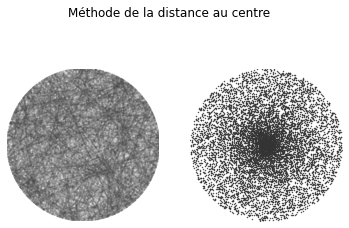

Bertrand, method 2 probability: 0.3255


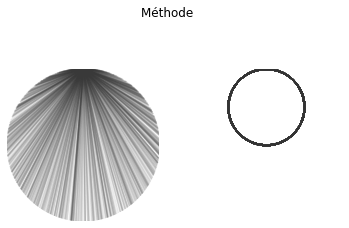

In [98]:
plot_bertrand(1)
plot_bertrand(2)